# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

/Users/bkarami/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Config

In [2]:
# Matplotlib styling configuration
mpl.style.use("fivethirtyeight")
mpl.rcParams["figure.figsize"] = (10, 10)

# Simulation for Example 1 in Medium Article

In [3]:
# Specify number of monte carlo simulations
N_ROUNDS = 10000

results = []
results_detailed = {"Sales (USD mln)": [],
                    "Base Sales (Without Patent)": [],
                    "Patent": [],
                    "Patent Markup": []
                   }

np.random.seed(1)

for rnd in range(N_ROUNDS):
    prob_patent = np.random.randint(0, 2)
    base_sales = round(np.random.triangular(1e6, 3e6, 9e6)
        / 1000000, 2)
    patent_markup = np.random.triangular(0.25, 0.5, 0.75)
    sales = round(base_sales + (base_sales * prob_patent * patent_markup), 2)
        
    results.append(sales)
    
    is_patented = "Yes" if prob_patent == 1 else "No"
    adjusted_patent_markup = patent_markup if prob_patent == 1 else 0
    
    results_detailed["Sales (USD mln)"].append(sales)
    results_detailed["Base Sales (Without Patent)"].append(base_sales)
    results_detailed["Patent"].append(is_patented)
    results_detailed["Patent Markup"].append(adjusted_patent_markup)    

In [4]:
pd.DataFrame(results_detailed).head(10)

,Sales (USD mln),Base Sales (Without Patent),Patent,Patent Markup
0,14.31,8.63,Yes,0.658183
1,4.45,3.21,Yes,0.385442
2,3.62,3.62,No,0.000000
3,3.62,3.62,No,0.000000
4,3.26,3.26,No,0.000000
5,6.58,6.58,No,0.000000
6,6.97,6.97,No,0.000000
7,3.52,2.50,Yes,0.407362
8,8.46,5.31,Yes,0.592980
9,8.39,5.16,Yes,0.625697


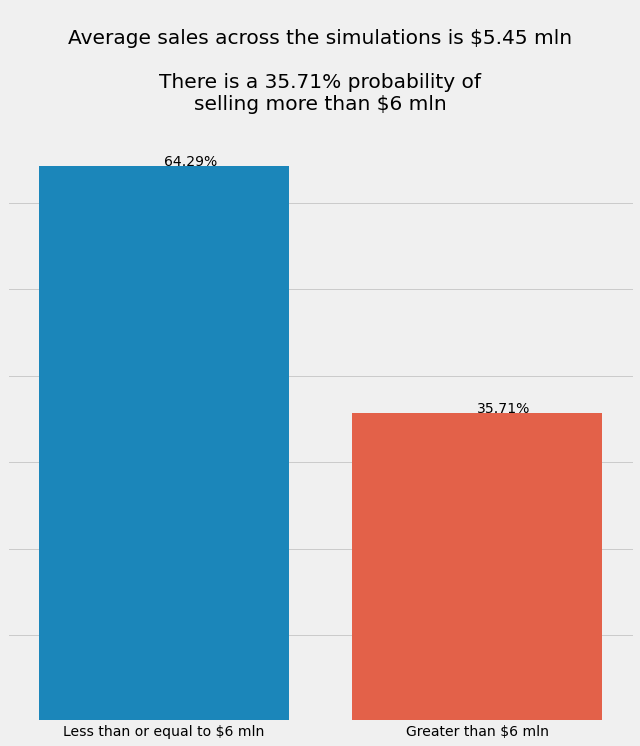

In [5]:
# Average sales across all the simulated scenarios
average_sales = np.mean(results)

# Split the results to reflect whether sales exceed 6 mln
binned_results = pd.cut(results, bins=[0, 6, 20], labels=[
    "Less than or equal to $6 mln",
    "Greater than $6 mln",])

# Plot the results
sns.barplot(x=binned_results.value_counts().index,
            y=binned_results.value_counts().values)

for bar_no, bar_val in enumerate(binned_results.value_counts()):
    plt.text(bar_no, bar_val, 
             f"{round(bar_val * 100 / N_ROUNDS, 2)}%")

plt.title(f"""
Average sales across the simulations is ${round(np.mean(results), 2)} mln

There is a {round(100 * np.mean(np.array(results) > 6), 2)}% probability of
selling more than $6 mln
""")

plt.tick_params(labelleft=False, left=False)

plt.show()

In [6]:
np.mean(np.array(results) >= 10)

0.0592

# Simulation for Example 2 in Medium Article

In [7]:
np.random.seed(1)

# Prepare hypothetical data for 5 years i.e. 12 months
subscription_data = {"Month": range(1, 61), 
                     "Net Growth (%)": np.random.normal(0, 0.05, 60)}

# Specify number of monte carlo simulations
N_ROUNDS = 10000

results = []

historical_data = subscription_data["Net Growth (%)"]

for rnd in range(N_ROUNDS):
    # Randomy selected growth rates from 12 months of history
    idx = np.random.randint(0, 60, 12)
    selected_growth_rates = historical_data[idx]
    
    # We are starting with 10,000 users
    users = 10000
    revenue_per_user = 10
    starting_revenue = users * revenue_per_user
    
    # Calculate revenue for each period then sum them up
    # to get total revenue across the selected 12 months
    # starting revenue is the first entry used to calculate
    # subsequent months but we drop it from the final calculation
    revenue_per_month = [starting_revenue]
    for growth_rate in selected_growth_rates:
        revenue_per_month.append(
            (1 + growth_rate) * revenue_per_month[-1])
    
    # Drop the pre-simulation starting month revenue
    total_revenue = np.sum(revenue_per_month[1:])
    results.append(total_revenue)

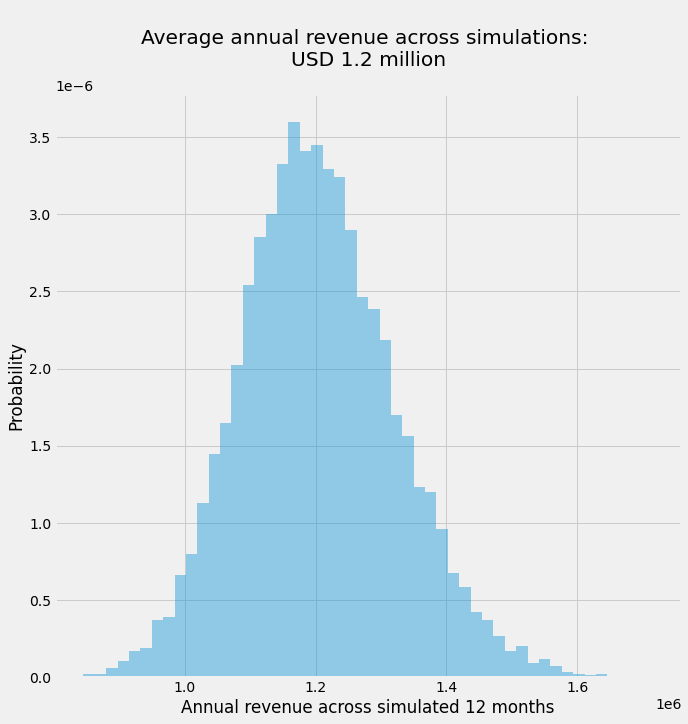

In [8]:
ax = sns.distplot(results, kde=False, norm_hist=True)
ax.set_xlabel("Annual revenue across simulated 12 months")
ax.set_ylabel("Probability")
plt.title(f"""
Average annual revenue across simulations: 
USD {round(np.mean(results) / 1e6, 2)} million
""")
plt.show()

In [9]:
sorted(results)[100]

950497.2898857256